In [1]:
import os

In [2]:
import keras
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

Using TensorFlow backend.


In [4]:
import keras
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7248)])
    print('success')
  except RuntimeError as e:
    print(e)

success


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
ls

 Volume in drive C is BOOTCAMP
 Volume Serial Number is 0EC5-8F74

 Directory of C:\Users\Brandon Luong\Desktop\Animal Classifier

03/20/2020  12:55 PM    <DIR>          .
03/20/2020  12:55 PM    <DIR>          ..
03/10/2020  12:16 PM    <DIR>          .ipynb_checkpoints
03/20/2020  12:55 PM           364,811 Animal Classifier.ipynb
03/10/2020  02:33 PM        28,163,680 model1.h5
03/10/2020  04:30 PM         9,478,712 model2.h5
03/10/2020  09:06 PM         9,479,856 model3.h5
03/13/2020  03:18 PM         9,479,856 model4.h5
03/13/2020  05:23 PM        80,556,936 model5.h5
03/13/2020  06:30 PM    <DIR>          model5.h6
03/13/2020  09:01 PM        80,556,872 model6.h5
03/13/2020  09:00 PM    <DIR>          model6.h6
03/10/2020  12:32 PM    <DIR>          raw-img
               7 File(s)    218,080,723 bytes
               6 Dir(s)  39,888,052,224 bytes free


In [3]:
fpath = 'C:\\Users\\Brandon Luong\\Desktop\\Animal Classifier\\raw-img'

In [4]:
labels = [ 'butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'horse',
 'sheep',
 'squirrel']

In [5]:
labels

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'horse', 'sheep', 'squirrel']

In [6]:
from matplotlib.image import imread

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from matplotlib.image import imread

In [12]:
#get dimension averages
dim1 = []
dim2 = []

for label in labels:
    print(label)
    for images in os.listdir(fpath+'\\' + label):
        if (images != '.DS_Store' and label!='elephant'):
            img = plt.imread(fpath+'\\' + label + '\\'+images)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)

butterfly


ValueError: not enough values to unpack (expected 3, got 0)

In [10]:
image_shape = (255,325,3)

In [11]:
#Preparing Data for the Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=10, # rotate the image 20 degrees
                               width_shift_range=0.05, # Shift the pic width by a max of 5%
                               height_shift_range=0.05, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split=0.2
                              )

In [13]:
batch_size = 64

In [14]:
train_gen = image_gen.flow_from_directory(
fpath,
target_size=image_shape[:2],
color_mode='rgb',
batch_size=batch_size,
class_mode='categorical',
subset = 'training')

Found 15933 images belonging to 8 classes.


In [15]:
test_gen = image_gen.flow_from_directory(
fpath,
target_size=image_shape[:2],
color_mode='rgb',
batch_size=batch_size,
class_mode='categorical',
subset = 'validation',
shuffle=False)

Found 3979 images belonging to 8 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
#creating the model

In [18]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=200, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 323, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 161, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 159, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 79, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 77, 200)       230600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 38, 200)       0         
_________________________________________________________________
flatten (Flatten)            (None, 228000)            0

In [18]:
model = load_model('model10.h5')

In [19]:
#early stopping:

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
results = model.fit_generator(test_gen, validation_data=test_gen, epochs=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 63 steps
63/63 [==============================] - 210s 3s/step - loss: 0.8022 - accuracy: 0.7404 - val_loss: 0.4961 - val_accuracy: 0.8321


In [28]:
losses = pd.DataFrame(model.history.history)

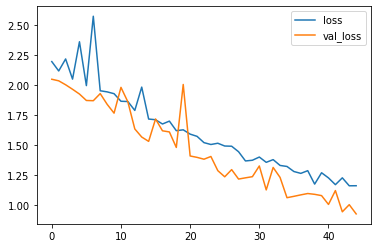

In [29]:
#from model 10
losses[['loss', 'val_loss']].plot()

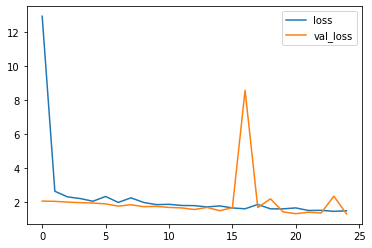

In [24]:
#from model 8
losses[['loss', 'val_loss']].plot()

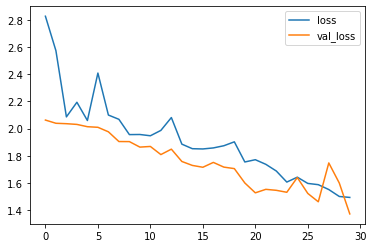

In [26]:
#from model 7
losses[['loss', 'val_loss']].plot()

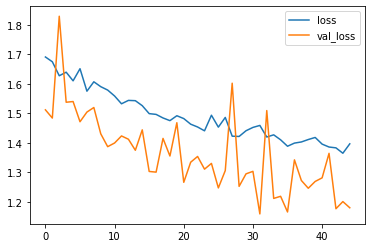

In [48]:
#from model 6
losses[['loss', 'val_loss']].plot()

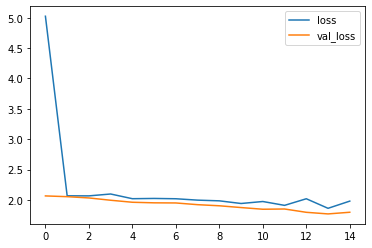

In [32]:
#from model 5
losses[['loss', 'val_loss']].plot()

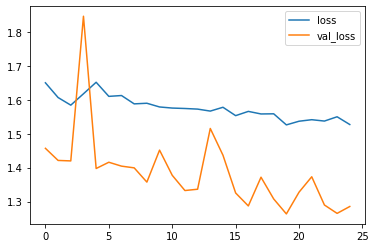

In [30]:
#from model 4
losses[['loss', 'val_loss']].plot()

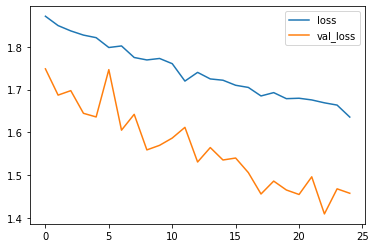

In [28]:
#from model 3
losses[['loss', 'val_loss']].plot()

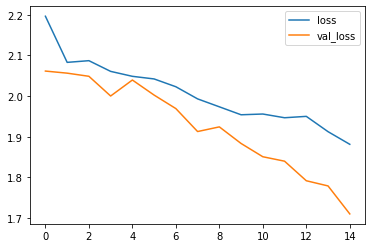

In [26]:
#from model 2
losses[['loss', 'val_loss']].plot()

In [22]:
from tensorflow.keras.models import load_model

In [32]:
model.save('model10.h5')

In [33]:
test_gen

In [52]:
cow = fpath + '\\horse\\OIP-_EaCX-zxGQzoZICekDzVaQHaE8.jpeg'

In [53]:
cow

'C:\\Users\\Brandon Luong\\Desktop\\Animal Classifier\\raw-img\\horse\\OIP-_EaCX-zxGQzoZICekDzVaQHaE8.jpeg'

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
my_image = image.load_img(cow,target_size=image_shape)

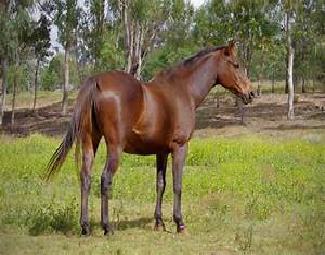

In [56]:
my_image

In [57]:
type(my_image)

PIL.Image.Image

In [58]:
my_image = image.img_to_array(my_image)

In [59]:
type(my_image)

numpy.ndarray

In [60]:
my_image.shape

(255, 325, 3)

In [61]:
my_image = np.expand_dims(my_image, axis=0)

In [62]:
my_image.shape

(1, 255, 325, 3)

In [63]:
model.predict_classes(my_image)

array([5], dtype=int64)

In [64]:
train_gen.class_indices

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'horse': 5,
 'sheep': 6,
 'squirrel': 7}

In [23]:
from sklearn.metrics import classification_report, confusion_matrix


In [27]:
y_pred = model.predict_classes(test_gen, batch_size=None)

In [28]:
#predictions from test 10.2
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       422
           1       0.96      0.71      0.81       333
           2       0.85      0.96      0.90       619
           3       0.95      0.45      0.61       373
           4       0.84      0.85      0.84       972
           5       0.70      0.92      0.80       524
           6       0.74      0.81      0.77       364
           7       0.80      0.83      0.82       372

    accuracy                           0.83      3979
   macro avg       0.85      0.81      0.81      3979
weighted avg       0.84      0.83      0.82      3979



In [26]:
#predictions from test 10.1
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       422
           1       0.86      0.71      0.78       333
           2       0.99      0.82      0.90       619
           3       0.74      0.68      0.71       373
           4       0.66      0.92      0.77       972
           5       0.81      0.81      0.81       524
           6       0.81      0.63      0.71       364
           7       0.83      0.69      0.76       372

    accuracy                           0.80      3979
   macro avg       0.84      0.77      0.80      3979
weighted avg       0.82      0.80      0.80      3979



In [34]:
#predictions from test 10
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       422
           1       0.85      0.50      0.63       333
           2       0.96      0.78      0.86       619
           3       0.82      0.27      0.40       373
           4       0.51      0.88      0.65       972
           5       0.68      0.63      0.65       524
           6       0.64      0.42      0.51       364
           7       0.69      0.62      0.65       372

    accuracy                           0.68      3979
   macro avg       0.75      0.62      0.65      3979
weighted avg       0.72      0.68      0.67      3979



In [27]:
#predictions from test 8
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.93      0.62       422
           1       0.78      0.11      0.19       333
           2       0.84      0.58      0.69       619
           3       0.38      0.57      0.46       373
           4       0.48      0.67      0.56       972
           5       0.58      0.41      0.48       524
           6       0.56      0.13      0.21       364
           7       0.49      0.40      0.44       372

    accuracy                           0.52      3979
   macro avg       0.57      0.47      0.46      3979
weighted avg       0.57      0.52      0.49      3979



In [31]:
#predictions from test 7
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       422
           1       0.53      0.20      0.29       333
           2       0.89      0.61      0.73       619
           3       0.69      0.08      0.15       373
           4       0.42      0.72      0.53       972
           5       0.33      0.85      0.47       524
           6       0.33      0.01      0.02       364
           7       0.78      0.04      0.07       372

    accuracy                           0.49      3979
   macro avg       0.61      0.40      0.38      3979
weighted avg       0.59      0.49      0.43      3979



In [43]:
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       422
           1       0.00      0.00      0.00       333
           2       0.79      0.64      0.71       619
           3       0.56      0.33      0.41       373
           4       0.40      0.90      0.55       972
           5       0.59      0.71      0.65       524
           6       0.74      0.12      0.20       364
           7       0.00      0.00      0.00       372

    accuracy                           0.54      3979
   macro avg       0.50      0.44      0.42      3979
weighted avg       0.51      0.54      0.48      3979



C:\Users\Brandon Luong\Anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
import seaborn as sns

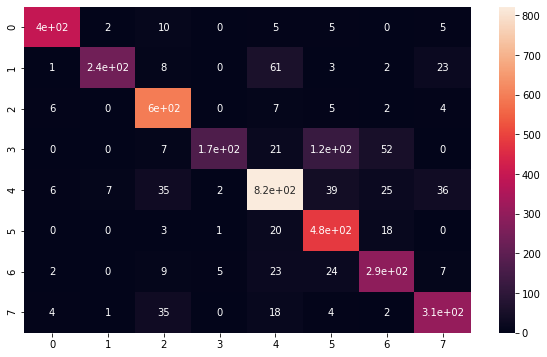

In [30]:
#from test 10.2
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_gen.classes, y_pred), annot=True)

In [31]:
#model 10.2
confusion_matrix(test_gen.classes, y_pred)

array([[395,   2,  10,   0,   5,   5,   0,   5],
       [  1, 235,   8,   0,  61,   3,   2,  23],
       [  6,   0, 595,   0,   7,   5,   2,   4],
       [  0,   0,   7, 169,  21, 124,  52,   0],
       [  6,   7,  35,   2, 822,  39,  25,  36],
       [  0,   0,   3,   1,  20, 482,  18,   0],
       [  2,   0,   9,   5,  23,  24, 294,   7],
       [  4,   1,  35,   0,  18,   4,   2, 308]], dtype=int64)

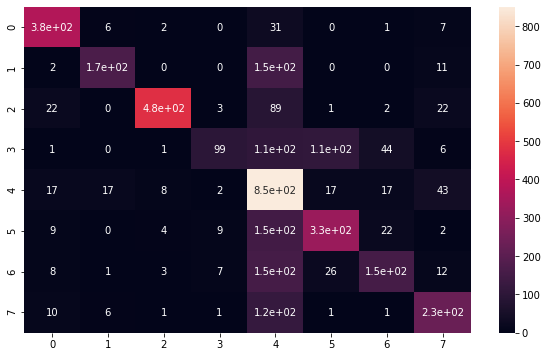

In [36]:
#from test 10
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_gen.classes, y_pred), annot=True)

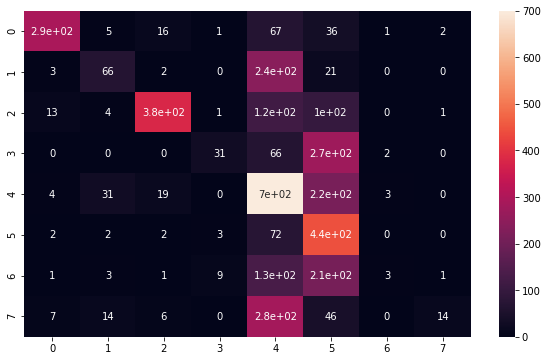

In [36]:
#from test 7
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_gen.classes, y_pred), annot=True)

In [37]:
#model 10
confusion_matrix(test_gen.classes, y_pred)


array([[375,   6,   2,   0,  31,   0,   1,   7],
       [  2, 168,   0,   0, 152,   0,   0,  11],
       [ 22,   0, 480,   3,  89,   1,   2,  22],
       [  1,   0,   1,  99, 109, 113,  44,   6],
       [ 17,  17,   8,   2, 851,  17,  17,  43],
       [  9,   0,   4,   9, 149, 329,  22,   2],
       [  8,   1,   3,   7, 154,  26, 153,  12],
       [ 10,   6,   1,   1, 121,   1,   1, 231]], dtype=int64)

In [37]:
confusion_matrix(test_gen.classes, y_pred)

array([[294,   5,  16,   1,  67,  36,   1,   2],
       [  3,  66,   2,   0, 241,  21,   0,   0],
       [ 13,   4, 380,   1, 119, 101,   0,   1],
       [  0,   0,   0,  31,  66, 274,   2,   0],
       [  4,  31,  19,   0, 700, 215,   3,   0],
       [  2,   2,   2,   3,  72, 443,   0,   0],
       [  1,   3,   1,   9, 133, 213,   3,   1],
       [  7,  14,   6,   0, 285,  46,   0,  14]], dtype=int64)

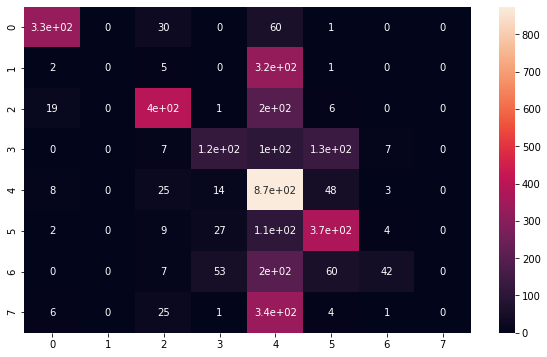

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_gen.classes, y_pred), annot=True)

In [47]:
confusion_matrix(test_gen.classes, y_pred)

array([[331,   0,  30,   0,  60,   1,   0,   0],
       [  2,   0,   5,   0, 325,   1,   0,   0],
       [ 19,   0, 398,   1, 195,   6,   0,   0],
       [  0,   0,   7, 122, 103, 134,   7,   0],
       [  8,   0,  25,  14, 874,  48,   3,   0],
       [  2,   0,   9,  27, 109, 373,   4,   0],
       [  0,   0,   7,  53, 202,  60,  42,   0],
       [  6,   0,  25,   1, 335,   4,   1,   0]], dtype=int64)